# Helmholtz Dirichlet problem (easyFEMpkg)

Solve: find $u$ such that

$-\Delta u - k^2 u = 0$ in $\Omega$, with Dirichlet $u=g$ on $\partial\Omega$.

For simplicity, we will assume $k=\pi\omega$. In that case, by choosing g accordingly, the exact solution will be:
$$u(x,y) = \sin(kx/\sqrt{2})\sin(ky/\sqrt{2}).$$

In [1]:
import math, numpy as np
import matplotlib.pyplot as plt
from easyFEMpkg.mesh import build_mesh
from easyFEMpkg.assemble import assemble_dirichlet, solve_system
from easyFEMpkg.plotting import show_mesh, trisurf_like, mesh_and_solution_side_by_side, trisurf_side_by_side
from easyFEMpkg.main import compute_error_norms

In [2]:
geometry = 'square'

#Set up the parameters for Helmholtz equation
omega = 1.0
k = np.pi*omega  # wave number

# The code assumes it solves -Δu - c u = f.
# Helmholtz: -Δu - k^2 u = 0  => interior coefficient c(x,y) = -(k**2)
def c(x, y):
    return -(k**2)

# Set up dirichlet data
def g(x, y):
    return math.sin(k/math.sqrt(2)*x)*math.sin(k/math.sqrt(2)*y)

In [3]:
# In order to consider different refinements, we need to pass a 'reference meshwidth'
#h_ref = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2]
h_ref = [0.25, 0.125, 0.0625, 0.03125, 0.015625]
# Note that we haven't implemented an actual refinement routine. Instead, 
# we will be simply generating finer meshes (i.e. we will have a sequence of meshes that is not nested).

__Task 1:__ Let us play with sampling!

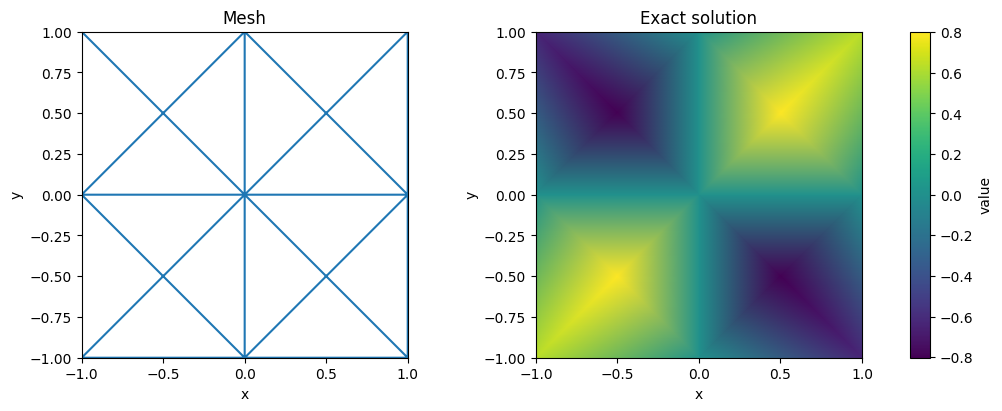

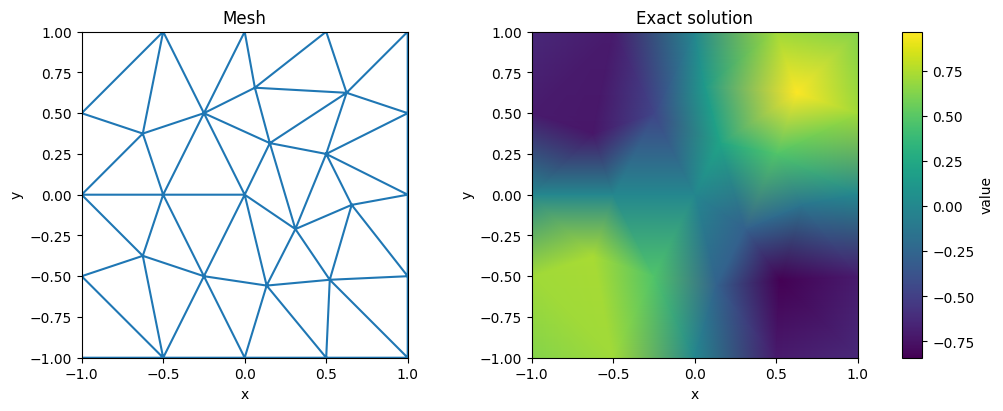

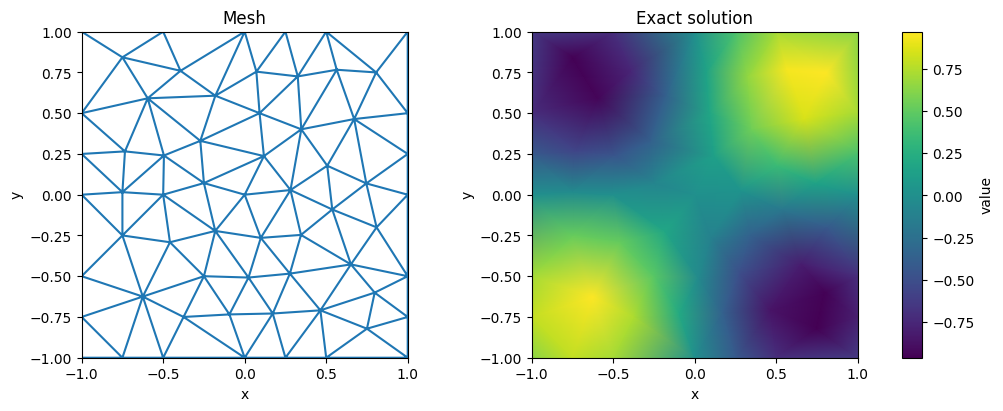

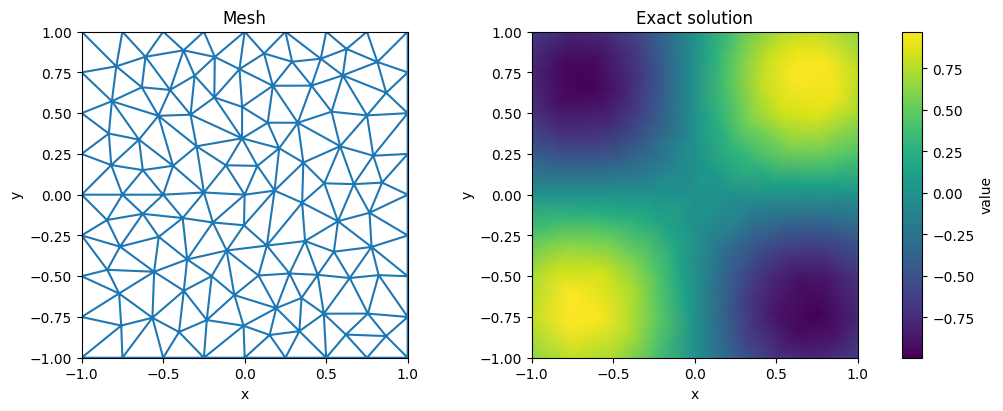

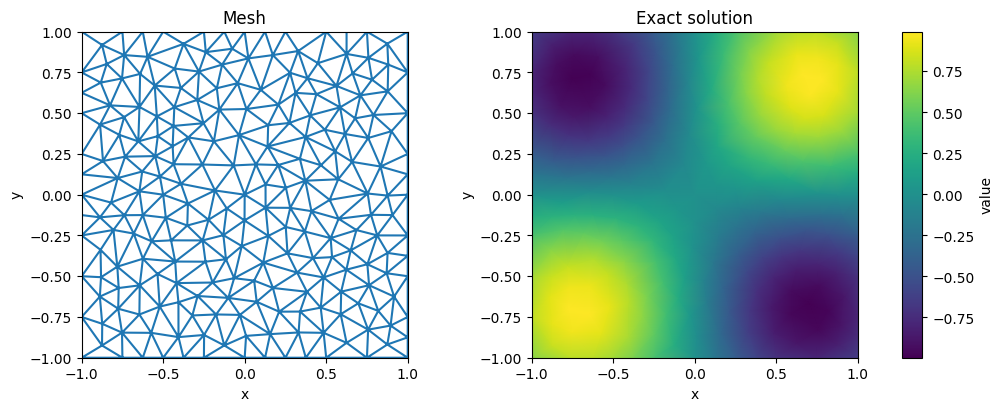

In [4]:
for max_area in h_ref:
    # Build the mesh and retrieve the mesh data:
    # p: mesh vertices
    # t: mesh elements (this is an array containing the numbering of the vertices that belong to the triangle)
    # bnd: array containing the boundary edges. This will be used for setting boundary conditions when needed.
    p, t, bnd = build_mesh(geometry, max_area=max_area)
    
    #Plot the exact solution  
    u_ref = np.array([g(x,y) for (x,y) in p])
    mesh_and_solution_side_by_side(p, t, u_ref, title="Exact solution")

Now rerun the code for different meshes and see what happens.